In [ ]:
#(a)
from ISLP import load_data
Boston = load_data('Boston')   # pandas DataFrame
print(Boston.shape)
print(Boston.columns.tolist())
Boston.head()

(506, 13)
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


(b)
1. Rows: 506 (each row = one suburb of Boston)\
2. Columns: 14 (each column = one variable)\
3. Explanation: Rows represent suburbs; columns represent various features that affect housing prices or the environment (e.g., crime rate, tax rate, number of rooms, school conditions, etc.).

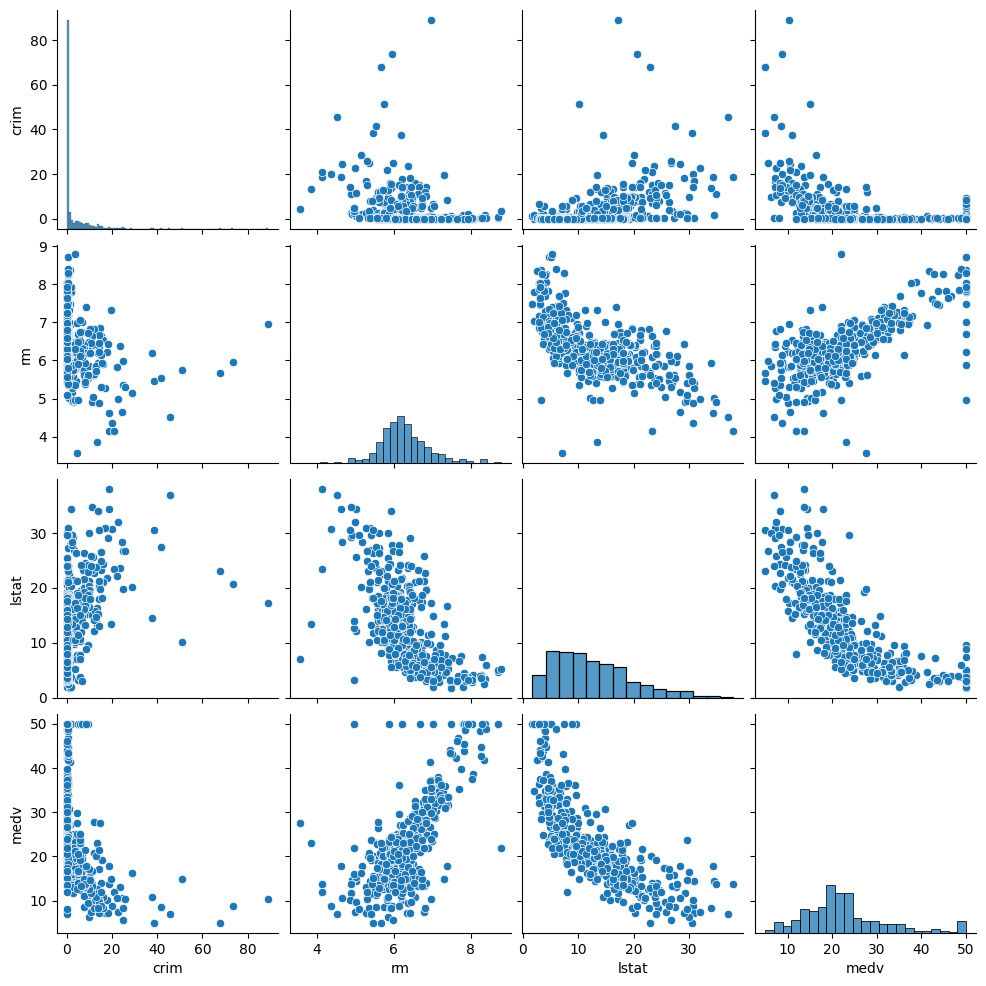

In [ ]:
#(c)
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP import load_data

# 載入 Boston 資料
Boston = load_data('Boston')

# 選擇幾個主要變數
cols = ['crim', 'rm', 'lstat', 'medv']

sns.pairplot(Boston[cols], diag_kind='hist')
plt.show()

(c)\
The scatterplots show several relationships:
1. rm and medv have a clear positive relationship: suburbs with more rooms tend to have higher house prices.
2. lstat and medv have a strong negative relationship: suburbs with higher proportions of lower-status population tend to have lower house prices.
3. crim and medv also show a negative relationship: higher crime rates are generally associated with lower house prices.
4. The distribution of crim is highly skewed, with most suburbs having low crime rates and a few having very high ones.

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


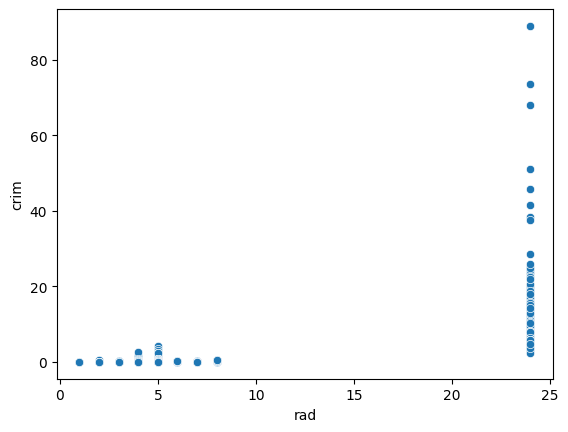

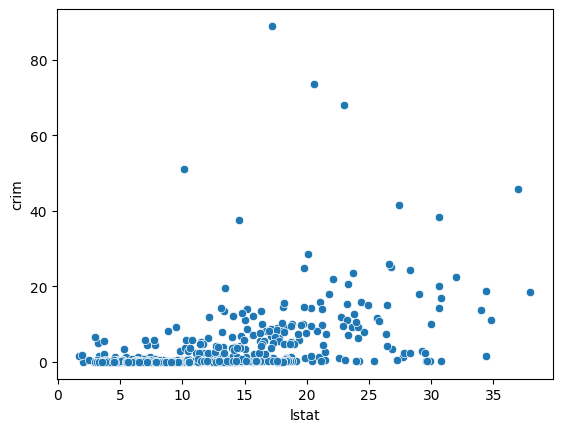

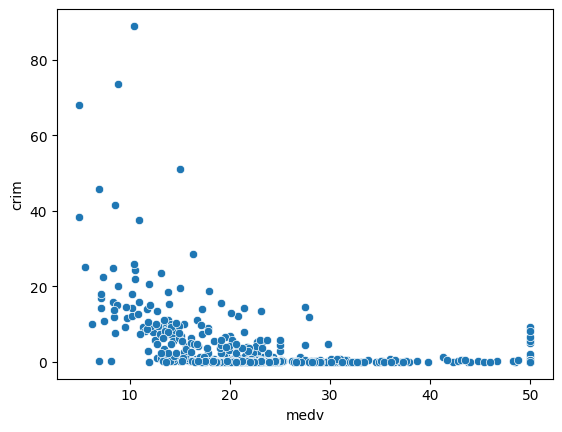

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corrs = Boston.corr()['crim'].sort_values(ascending=False)
print(corrs)

sns.scatterplot(x='rad', y='crim', data=Boston)
plt.show()

sns.scatterplot(x='lstat', y='crim', data=Boston)
plt.show()

sns.scatterplot(x='medv', y='crim', data=Boston)
plt.show()

(d)\
Yes. Several predictors are associated with per capita crime rate:
1. rad is positively associated with crim: suburbs with greater highway accessibility tend to have higher crime rates.
2. lstat is positively associated with crim: suburbs with higher proportions of lower-status population have higher crime rates.
3. medv is negatively associated with crim: wealthier suburbs tend to have lower crime rates.
4. dis is negatively associated with crim: suburbs farther from employment centers tend to have lower crime rates.

In [ ]:
#(e)
print("Crime rate range:", Boston['crim'].min(), "to", Boston['crim'].max())
print("Tax rate range:", Boston['tax'].min(), "to", Boston['tax'].max())
print("Pupil-teacher ratio range:", Boston['ptratio'].min(), "to", Boston['ptratio'].max())

high_crime = Boston[Boston['crim'] > 50]
high_tax   = Boston[Boston['tax']  == Boston['tax'].max()]
high_ptr   = Boston[Boston['ptratio'] == Boston['ptratio'].max()]

print("Suburbs with very high crime rates:\n", high_crime)
print("Suburbs with max tax:\n", high_tax)
print("Suburbs with max pupil-teacher ratio:\n", high_ptr)

Crime rate range: 0.00632 to 88.9762
Tax rate range: 187 to 711
Pupil-teacher ratio range: 12.6 to 22.0
Suburbs with very high crime rates:
         crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
380  88.9762  0.0   18.1     0  0.671  6.968   91.9  1.4165   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   
410  51.1358  0.0   18.1     0  0.597  5.757  100.0  1.4130   24  666   
418  73.5341  0.0   18.1     0  0.679  5.957  100.0  1.8026   24  666   

     ptratio  lstat  medv  
380     20.2  17.21  10.4  
405     20.2  22.98   5.0  
410     20.2  10.11  15.0  
418     20.2  20.62   8.8  
Suburbs with max tax:
         crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
488  0.15086  0.0  27.74     0  0.609  5.454  92.7  1.8209    4  711     20.1   
489  0.18337  0.0  27.74     0  0.609  5.414  98.3  1.7554    4  711     20.1   
490  0.20746  0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711     20.1   
491  0

(e)\
Yes. A few suburbs stand out with extreme values:
1. Crime rate (crim) ranges from ~0.00632 to ~88.9762. Most suburbs have low crime rates, but a handful show extremely high values (>50).
2. Tax rate (tax) ranges from 187 to 711. A few suburbs reach the maximum tax rate of 711, which is substantially higher than the rest.
3. Pupil-teacher ratio (ptratio) ranges from 12.6 to 22.0. Some suburbs hit the maximum of 22, indicating relatively crowded schools.

In [ ]:
#(f)
num_river = (Boston['chas'] == 1).sum()
print("Number of suburbs bordering Charles River:", num_river)

Number of suburbs bordering Charles River: 35


(f)\
There are 35 suburbs in the Boston data set that bound the Charles River (chas = 1).

In [ ]:
median_ptratio = Boston['ptratio'].median()
print("Median pupil-teacher ratio:", median_ptratio)

Median pupil-teacher ratio: 19.05


(g)\
The median pupil-teacher ratio among the Boston suburbs is 19.05.

In [ ]:
#(h)
#找到 medv 最小的 suburb
min_medv = Boston['medv'].min()
lowest_suburb = Boston[Boston['medv'] == min_medv]
print("Lowest median home value:", min_medv)
print(lowest_suburb)

#各變數範圍
summary = Boston.describe().T[['min', 'max']]
print(summary)

Lowest median home value: 5.0
        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   

     ptratio  lstat  medv  
398     20.2  30.59   5.0  
405     20.2  22.98   5.0  
               min       max
crim       0.00632   88.9762
zn         0.00000  100.0000
indus      0.46000   27.7400
chas       0.00000    1.0000
nox        0.38500    0.8710
rm         3.56100    8.7800
age        2.90000  100.0000
dis        1.12960   12.1265
rad        1.00000   24.0000
tax      187.00000  711.0000
ptratio   12.60000   22.0000
lstat      1.73000   37.9700
medv       5.00000   50.0000


(h)\
The suburb with the lowest median home value (medv = 5.0) has extreme characteristics compared to most others:

1. High crime rate (crim)
2. Low average number of rooms (rm)
3. High proportion of lower-status population (lstat)
4. Relatively high tax rate and pupil-teacher ratio

These unfavorable socioeconomic and environmental conditions explain why the suburb has the lowest housing values in the data set.

In [ ]:
#(i)
more_than_7 = (Boston['rm'] > 7).sum()
more_than_8 = (Boston['rm'] > 8).sum()

print("Suburbs with rm > 7:", more_than_7)
print("Suburbs with rm > 8:", more_than_8)

# 看看 rm > 8 的 suburb 的特徵
elite_suburbs = Boston[Boston['rm'] > 8]
print(elite_suburbs[['rm','medv','crim','lstat']])

Suburbs with rm > 7: 64
Suburbs with rm > 8: 13
        rm  medv     crim  lstat
97   8.069  38.7  0.12083   4.21
163  8.375  50.0  1.51902   3.32
204  8.034  50.0  0.02009   2.88
224  8.266  44.8  0.31533   4.14
225  8.725  50.0  0.52693   4.63
226  8.040  37.6  0.38214   3.13
232  8.337  41.7  0.57529   2.47
233  8.247  48.3  0.33147   3.95
253  8.259  42.8  0.36894   3.54
257  8.704  50.0  0.61154   5.12
262  8.398  48.8  0.52014   5.91
267  8.297  50.0  0.57834   7.44
364  8.780  21.9  3.47428   5.29


(i)
1. There are 64 suburbs with an average of more than seven rooms per dwelling.
2. There are 13 suburbs with an average of more than eight rooms per dwelling.
3. The suburbs with rm > 8 are characterized by very high median home values (close to $50,000), low crime rates, and low proportions of lower-status population. These areas represent Boston’s most affluent neighborhoods.